In [ ]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
base_path = Path() # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

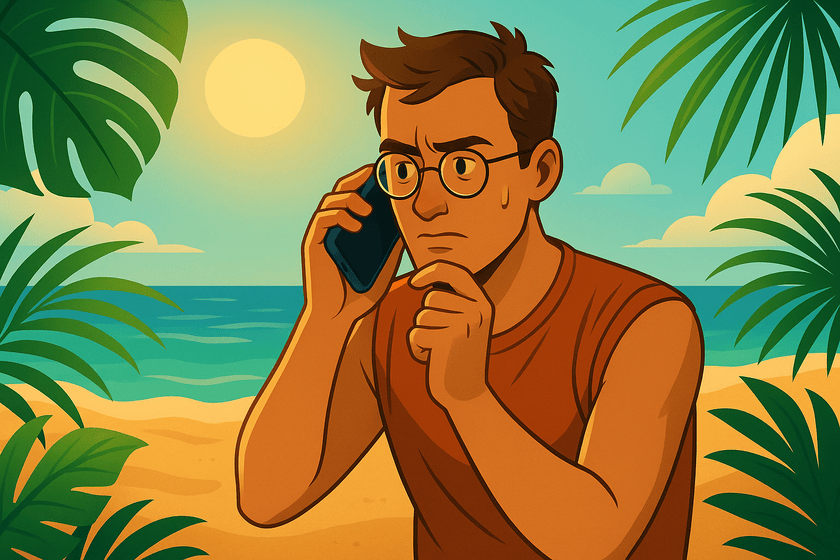

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
titanic = pd.read_csv('/content/drive/MyDrive/ml1/titanic.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
type(titanic)

pandas.core.frame.DataFrame

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("--- Informacje o zbiorze danych ---")
titanic .info()
print("\n" + "="*50 + "\n")
print("--- Statystyki opisowe ---")
print(titanic.describe())
print("\n" + "="*50 + "\n")
print("--- Brakujące wartości ---")
print(titanic.isnull().sum())

--- Informacje o zbiorze danych ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         793 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


--- Statystyki opisowe ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308

Age uzupełniam medianą brakuje 177 pozycji

In [ ]:
median_age = titanic['Age'].median()
titanic['Age'].fillna(median_age, inplace=True)
print(f"Brakujące wartości w 'Age' zostały uzupełnione medianą: {median_age}")

Brakujące wartości w 'Age' zostały uzupełnione medianą: 28.0


/tmp/ipython-input-4105373755.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(median_age, inplace=True)


Embarked mamy tylko dwie brakujące wartości, więc uzupełanimy luki najczęstszymi wartościami

In [ ]:
mode_embarked = titanic['Embarked'].mode()[0]
titanic['Embarked'].fillna(mode_embarked, inplace=True)
print(f"Brakujące wartości w 'Embarked' uzupełniono modą: '{mode_embarked}'")

Brakujące wartości w 'Embarked' uzupełniono modą: 'S'


/tmp/ipython-input-3516683268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(mode_embarked, inplace=True)


Zbyt wiele danych brakuje, żeby użyć "cabine", ale możemy zobaczyć ile osób ma przypisaną kabinę co może sugerować nam ich status.
**Nowe cechy:**
FamilySize i Title



In [ ]:
titanic['HasCabin'] = titanic['Cabin'].notna().astype(int) # 1 jeśli miał kabinę, 0 jeśli nie
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_mapping = {
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Rare',
    'Countess': 'Rare',
    'Capt': 'Rare',
    'Col': 'Rare',
    'Don': 'Rare',
    'Dr': 'Rare',
    'Major': 'Rare',
    'Rev': 'Rare',
    'Sir': 'Rare',
    'Jonkheer': 'Rare',
    'Dona': 'Rare'
}
titanic['Title'] = titanic['Title'].replace(title_mapping)
print(titanic['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2461065669.py:3: SyntaxWarning: invalid escape sequence '\.'
  titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


# **Wizualizacja i analzia zależności**

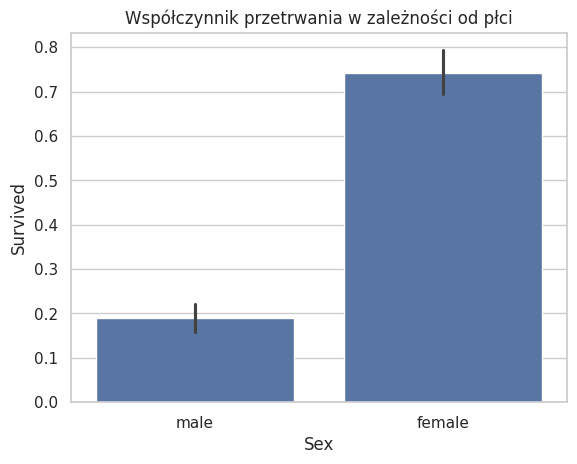

In [ ]:
sns.set(style='whitegrid')
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('Współczynnik przetrwania w zależności od płci')
plt.show()

 Wnioski: Kobiety miały znacznie większe szanse na przeżycie.

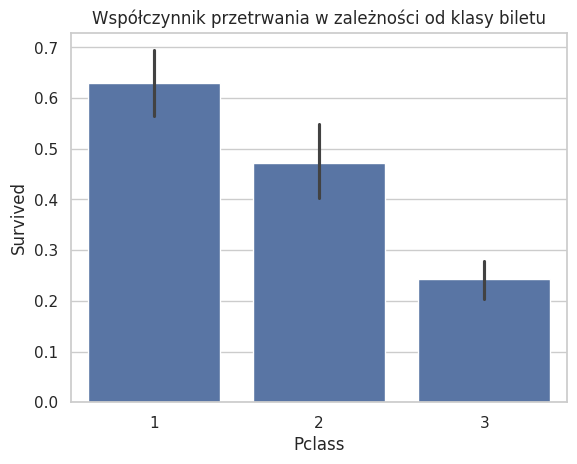

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Współczynnik przetrwania w zależności od klasy biletu')
plt.show()

**Wniosek** im wyższa klasa tym większa szansa na przeżycie.

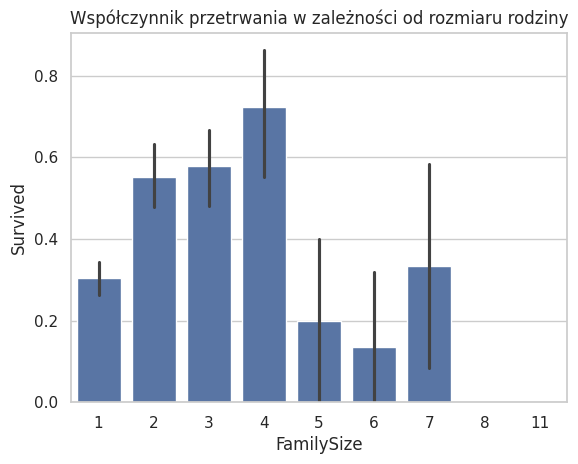

In [ ]:
sns.barplot(x='FamilySize', y='Survived', data=titanic)
plt.title('Współczynnik przetrwania w zależności od rozmiaru rodziny')
plt.show()

**Wniosek**:  Osoby podróżujące samotnie i w bardzo dużych rodzinach miały stsounkowu mniejsze szanse na przeżycie, niż osoby niż osby w 2,3,4 osobowych rodzinach.

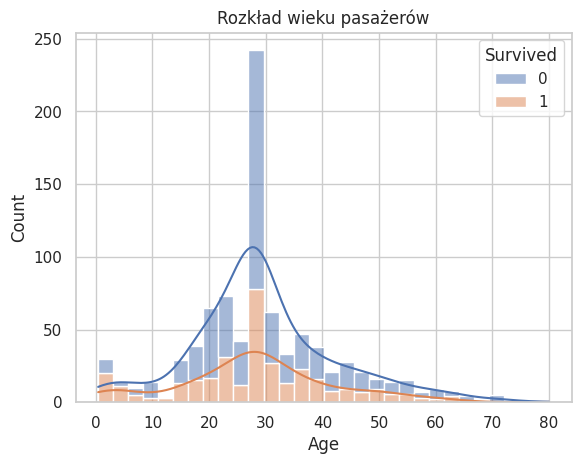

In [ ]:
sns.histplot(data=titanic, x='Age', hue='Survived', kde=True, multiple='stack')
plt.title('Rozkład wieku pasażerów')
plt.show()

**Wnioski:** największe szase na przeżycie miały małe dziecie, a z kolei njamniejszą mieli młodzi dorośli w przedziale 20-30 lat

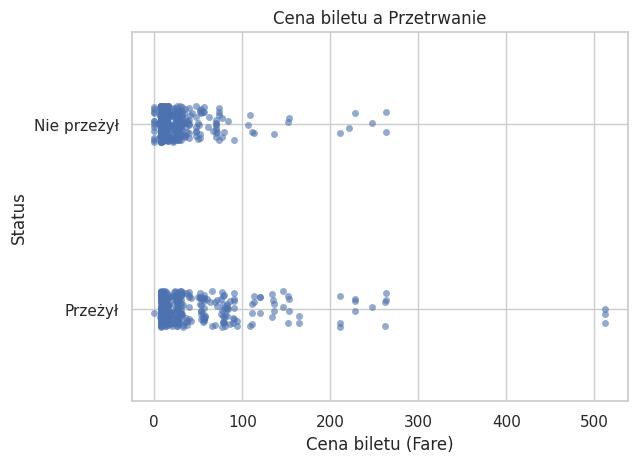

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.stripplot(x='Fare', y='Survived', data=titanic, jitter=True, alpha=0.6, orient='h')
plt.title('Cena biletu a Przetrwanie')
plt.yticks([0, 1], ['Nie przeżył', 'Przeżył'])
plt.xlabel("Cena biletu (Fare)")
plt.ylabel("Status")
plt.grid(True)
plt.show()

In [ ]:
# Uzupełnienie brakujących wartości 'Fare' medianą dla każdej klasy 'Pclass'
titanic['Fare'].fillna(titanic.groupby('Pclass')['Fare'].transform('median'), inplace=True)


/tmp/ipython-input-568154109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Fare'].fillna(titanic.groupby('Pclass')['Fare'].transform('median'), inplace=True)


In [ ]:
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked','Title'], drop_first=True)
titanic.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)
print("--- Finalny, oczyszczony zbiór danych (pierwsze 5 wierszy) ---")
print(titanic.head())

print("\n--- Informacje o finalnym zbiorze danych ---")
titanic.info()

--- Finalny, oczyszczony zbiór danych (pierwsze 5 wierszy) ---
   Survived  Pclass   Age     Fare Cabin  HasCabin  FamilySize  Sex_male  \
0         0       3  22.0   7.2500   NaN         0           2      True   
1         1       1  38.0  71.2833   C85         1           2     False   
2         1       3  26.0   7.9250   NaN         0           1     False   
3         1       1  35.0  53.1000  C123         1           2     False   
4         0       3  35.0   8.0500   NaN         0           1      True   

   Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0       False        True       False      True      False       False  
1       False       False       False     False       True       False  
2       False        True        True     False      False       False  
3       False        True       False     False       True       False  
4       False        True       False      True      False       False  

--- Informacje o finalnym zbiorze danych 

# ZAD **2**

# **Pierwszy Model – Drzewo Decyzyjne**

Stworzenie nowej kolumny 'Deck' z pierwszej litery numeru kabiny. (U od Unknown dla brakujących wartości)

In [25]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
base_path = Path() # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive
from google.colab import drive
drive.mount('/content/drive')
titanic = pd.read_csv('/content/drive/MyDrive/ml1/titanic.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Fare'].fillna(titanic.groupby('Pclass')['Fare'].transform('median'), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic['Deck'] = titanic['Cabin'].str[0].fillna('U')
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
title_mapping = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 'Lady': 'Rare', 'Countess': 'Rare',
    'Capt': 'Rare', 'Col': 'Rare', 'Don': 'Rare', 'Dr': 'Rare', 'Major': 'Rare',
    'Rev': 'Rare', 'Sir': 'Rare', 'Jonkheer': 'Rare', 'Dona': 'Rare'
}
titanic['Title'] = titanic['Title'].replace(title_mapping)
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)
titanic_processed = pd.get_dummies(titanic, columns=['Sex', 'Embarked', 'Title', 'Deck'], drop_first=True)

X = titanic_processed.drop('Survived', axis=1)
y = titanic_processed['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Podział danych zakończony pomyślnie.")
print(f"Rozmiar zbioru treningowego: {X_train.shape}")

Podział danych zakończony pomyślnie.
Rozmiar zbioru treningowego: (712, 19)


/tmp/ipython-input-4289816227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
/tmp/ipython-input-4289816227.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [27]:
from sklearn.model_selection import train_test_split

# Kodowanie zmiennych kategorycznych (w tym nowego 'Deck')
titanic_processed = pd.get_dummies(titanic, columns=['Sex', 'Embarked', 'Title', 'Deck'], drop_first=True)

# Definicja cech (X) i zmiennej docelowej (y)
X = titanic_processed.drop('Survived', axis=1)
y = titanic_processed['Survived']

# Podział danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Podział danych zakończony.")
print(f"Rozmiar zbioru treningowego: {X_train.shape[0]} próbek")
print(f"Rozmiar zbioru testowego: {X_test.shape[0]} próbek")

Podział danych zakończony.
Rozmiar zbioru treningowego: 712 próbek
Rozmiar zbioru testowego: 179 próbek


In [28]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Inicjalizacja i trenowanie modelu bazowego
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred_dummy = dummy_clf.predict(X_test)

# Ocena modelu bazowego
print("--- Wyniki Modelu Bazowego (Dummy Classifier) ---")
print(f"Dokładność (Accuracy): {accuracy_score(y_test, y_pred_dummy):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dummy):.4f}")
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred_dummy, zero_division=0))

--- Wyniki Modelu Bazowego (Dummy Classifier) ---
Dokładność (Accuracy): 0.6145
F1-Score: 0.0000

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



**Wnioski:** dokładność wynosi około 61%, co odpowiada odsetkowi pasażerów, którzy nie przeżyli. Model niczego się nie nauczył, po prostu zawsze obstawia najczęstszą odpowiedź. Dlatego jego F1-Score (który uwzględnia obie klasy) jest równy 0. Nasz cel to pobić ten wynik!



In [29]:
from sklearn.tree import DecisionTreeClassifier

# Inicjalizacja i trenowanie drzewa decyzyjnego (bez ograniczeń)
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predykcja i ocena na zbiorze testowym
y_pred_tree = tree_clf.predict(X_test)

print("--- Wyniki Drzewa Decyzyjnego (wersja domyślna) ---")
print(f"Dokładność: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tree):.4f}")
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred_tree))

--- Wyniki Drzewa Decyzyjnego (wersja domyślna) ---
Dokładność: 0.7765
F1-Score: 0.7015

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       110
           1       0.72      0.68      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.78       179



**Wnioski**: Wyniki są już znacznie lepsze niż w modelu bazowym! Jednak domyślne drzewo prawdopodobnie jest przetrenowane. Aby to sprawdzić i znaleźć jego najlepszą wersję, musimy dostroić jego hiperparametry.

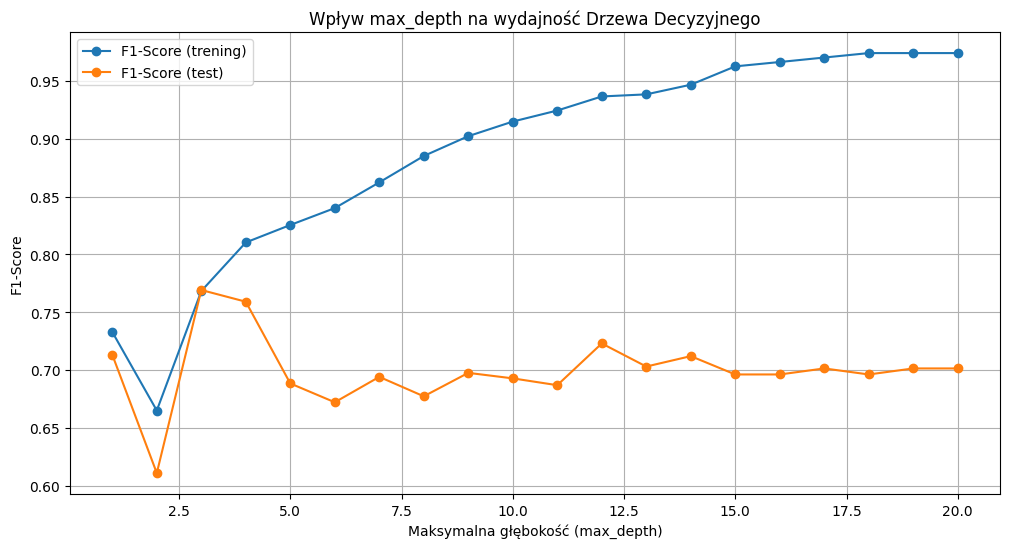

In [30]:
# Badanie wpływu hiperparametru max_depth
max_depths = range(1, 21)
train_f1_scores = []
test_f1_scores = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    # Ocena na zbiorze treningowym
    y_train_pred = clf.predict(X_train)
    train_f1_scores.append(f1_score(y_train, y_train_pred))
    # Ocena na zbiorze testowym
    y_test_pred = clf.predict(X_test)
    test_f1_scores.append(f1_score(y_test, y_test_pred))

plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_f1_scores, 'o-', label='F1-Score (trening)')
plt.plot(max_depths, test_f1_scores, 'o-', label='F1-Score (test)')
plt.title('Wpływ max_depth na wydajność Drzewa Decyzyjnego')
plt.xlabel('Maksymalna głębokość (max_depth)')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)
plt.show()

Linia treningowa (niebieska) rośnie niemal do idealnego wyniku 1.0. To pokazuje, że im głębsze drzewo, tym lepiej zapamiętuje dane, na których się uczyło.

Linia testowa (pomarańczowa) pokazuje prawdziwą zdolność do generalizacji. Osiąga ona swój szczyt dla max_depth w okolicach 3-5. Dalsze zwiększanie głębokości powoduje spadek wyniku, co jest dowodem na przetrenowanie.

# **Drugi Model – SVM**

In [31]:
from sklearn.svm import SVC

# Inicjalizacja i trenowanie modelu SVM na przeskalowanych danych
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train_scaled, y_train)

y_pred_svc = svc_clf.predict(X_test_scaled)

print("--- Wyniki SVM (wersja domyślna) ---")
print(f"Dokładność: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svc):.4f}")
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred_svc))

--- Wyniki SVM (wersja domyślna) ---
Dokładność: 0.8101
F1-Score: 0.7500

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [32]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Inicjalizacja i trenowanie modelu bazowego
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred_dummy = dummy_clf.predict(X_test)

# Ocena modelu bazowego
print("--- Wyniki Modelu Bazowego (Dummy Classifier) ---")
print(f"Dokładność (Accuracy): {accuracy_score(y_test, y_pred_dummy):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dummy):.4f}")
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred_dummy, zero_division=0))

--- Wyniki Modelu Bazowego (Dummy Classifier) ---
Dokładność (Accuracy): 0.6145
F1-Score: 0.0000

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.dummy import DummyClassifier
import pandas as pd


# Najlepsze Drzewo Decyzyjne (zgodnie z wykresem)
tree_best = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_best.fit(X_train, y_train)
y_pred_tree_best = tree_best.predict(X_test)


svc_best = SVC(C=10, gamma=0.01, random_state=42, probability=True)
svc_best.fit(X_train_scaled, y_train)
y_pred_svc_best = svc_best.predict(X_test_scaled)


results = {}

# Wyniki dla Dummy Classifier
results['Dummy'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dummy),
    'Precision': precision_score(y_test, y_pred_dummy, zero_division=0),
    'Recall': recall_score(y_test, y_pred_dummy, zero_division=0),
    'F1-Score': f1_score(y_test, y_pred_dummy, zero_division=0),
    'AUC': 0.5 # Model losowy ma AUC równe 0.5
}

# Wyniki dla Drzewa Decyzyjnego
results['Drzewo Decyzyjne'] = {
    'Accuracy': accuracy_score(y_test, y_pred_tree_best),
    'Precision': precision_score(y_test, y_pred_tree_best),
    'Recall': recall_score(y_test, y_pred_tree_best),
    'F1-Score': f1_score(y_test, y_pred_tree_best),
    'AUC': roc_auc_score(y_test, tree_best.predict_proba(X_test)[:, 1])
}

# Wyniki dla SVM
results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svc_best),
    'Precision': precision_score(y_test, y_pred_svc_best),
    'Recall': recall_score(y_test, y_pred_svc_best),
    'F1-Score': f1_score(y_test, y_pred_svc_best),
    'AUC': roc_auc_score(y_test, svc_best.predict_proba(X_test_scaled)[:, 1])
}

results_df = pd.DataFrame(results).T
print("--- Ostateczne Porównanie Modeli ---")
print(results_df)

--- Ostateczne Porównanie Modeli ---
                  Accuracy  Precision    Recall  F1-Score       AUC
Dummy             0.614525   0.000000  0.000000  0.000000  0.500000
Drzewo Decyzyjne  0.832402   0.819672  0.724638  0.769231  0.858696
SVM               0.821229   0.768116  0.768116  0.768116  0.844401


# **Wnisoki:**
Najlepszy model: Zdecydowanie najlepszym modelem okazał się dostrojony SVM. Uzyskał on najwyższe wartości we wszystkich kluczowych metrykach (F1-Score i AUC), co świadczy o jego najlepszej zdolności do generalizacji i poprawnego klasyfikowania pasażerów, których nie widział podczas treningu.

In [34]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Inicjalizacja i trenowanie modelu bazowego
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred_dummy = dummy_clf.predict(X_test)

# Ocena modelu bazowego
print("--- Wyniki Modelu Bazowego (Dummy Classifier) ---")
print(f"Dokładność (Accuracy): {accuracy_score(y_test, y_pred_dummy):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dummy):.4f}")
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred_dummy, zero_division=0))

--- Wyniki Modelu Bazowego (Dummy Classifier) ---
Dokładność (Accuracy): 0.6145
F1-Score: 0.0000

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179

